In [40]:
import numpy as np
import pandas as pd
import json

# Classes

In [2]:
classes = [2,3,4,6,8, 16,17,18, 27,28,31,33, 62,63, 73,77, 84]
#['bicycle','car','motorcycle','bus','truck', 'bird','cat','dog', 'backpack','umbrella','handbag','suitcase', 'chair','couch', 'laptop','cell phone', 'book']

# Map
mp = pd.read_csv('map.csv', names=['Name', 'Label'])

# Classes
class_description = pd.read_csv('class_map.csv', names=['Label', 'Name'])

# Map
classMap = class_description[class_description['Label'].isin(classes)]
classMap.reset_index(drop=True, inplace=True)
classMap

,Label,Name
0,2,bicycle
1,3,car
2,4,motorcycle
3,6,bus
4,8,truck
5,16,bird
6,17,cat
7,18,dog
8,27,backpack
9,28,umbrella


# Load

In [12]:
t = open('annotations_trainval2017/annotations/instances_train2017.json')
train = json.load(t)
train_ann = pd.DataFrame(train['annotations'])
train_img = pd.DataFrame(train['images'])

v = open('annotations_trainval2017/annotations/instances_val2017.json')
val = json.load(v)
val_ann = pd.DataFrame(val['annotations'])
val_img = pd.DataFrame(val['images'])

# Train

In [13]:
train_ann = train_ann[train_ann['category_id'].isin(classes)]
train_ann.reset_index(inplace=True, drop=True)
train_ann.drop(['segmentation', 'area', 'iscrowd', 'id'], axis=1, inplace=True)
train_ann.columns = ['id', 'bbox', 'category_id',]
train_ann

,id,bbox,category_id
0,495357,"[337.02, 244.46, 66.47, 66.75]",18
1,116061,"[213.81, 192.39, 53.94, 70.28]",18
2,16164,"[324.66, 247.92, 250.87, 181.02]",18
3,205350,"[260.18, 252.76, 67.91, 53.3]",18
4,74,"[61.87, 276.25, 296.42, 103.18]",18
...,...,...,...
215910,426906,"[29, 189, 207, 401]",84
215911,350621,"[91, 212, 548, 212]",62
215912,426911,"[239, 65, 74, 163]",84
215913,301261,"[384, 209, 35, 241]",31


In [14]:
train_img = train_img[train_img['id'].isin(train_ann['id'])]
train_img.reset_index(inplace=True, drop=True)
train_img.drop(['license', 'coco_url', 'date_captured', 'flickr_url'], axis=1, inplace=True)
train_img['set'] = 'train2017'
train_img

,file_name,height,width,id,set
0,000000391895.jpg,360,640,391895,train2017
1,000000184613.jpg,336,500,184613,train2017
2,000000574769.jpg,640,480,574769,train2017
3,000000005802.jpg,479,640,5802,train2017
4,000000118113.jpg,640,480,118113,train2017
...,...,...,...,...,...
53877,000000432062.jpg,433,640,432062,train2017
53878,000000135676.jpg,428,640,135676,train2017
53879,000000155379.jpg,480,640,155379,train2017
53880,000000444010.jpg,480,640,444010,train2017


# Val

In [15]:
val_ann = val_ann[val_ann['category_id'].isin(classes)]
val_ann.reset_index(inplace=True, drop=True)
val_ann.drop(['segmentation', 'area', 'iscrowd', 'id'], axis=1, inplace=True)
val_ann.columns = ['id', 'bbox', 'category_id',]
val_ann

,id,bbox,category_id
0,289343,"[473.07, 395.93, 38.65, 28.67]",18
1,61471,"[272.1, 200.23, 151.97, 279.77]",18
2,472375,"[124.71, 196.18, 372.85, 356.81]",18
3,520301,"[112.71, 154.82, 367.29, 479.35]",18
4,579321,"[200.61, 89.65, 400.22, 251.02]",18
...,...,...,...
9507,65288,"[122, 78, 513, 348]",62
9508,49761,"[0, 169, 639, 81]",16
9509,573943,"[130, 346, 184, 38]",8
9510,632,"[416, 43, 153, 303]",84


In [16]:
val_img = val_img[val_img['id'].isin(val_ann['id'])]
val_img.reset_index(inplace=True, drop=True)
val_img.drop(['license', 'coco_url', 'date_captured', 'flickr_url'], axis=1, inplace=True)
val_img['set'] = 'val2017'
val_img

,file_name,height,width,id,set
0,000000037777.jpg,230,352,37777,val2017
1,000000252219.jpg,428,640,252219,val2017
2,000000087038.jpg,480,640,87038,val2017
3,000000174482.jpg,388,640,174482,val2017
4,000000480985.jpg,500,375,480985,val2017
...,...,...,...,...,...
2331,000000478721.jpg,480,640,478721,val2017
2332,000000033759.jpg,457,640,33759,val2017
2333,000000512403.jpg,640,529,512403,val2017
2334,000000168974.jpg,500,375,168974,val2017


# DataFrame

In [18]:
train = pd.merge(train_ann, train_img, on='id')
train['name'] = train['category_id'].map(classMap.set_index('Label')['Name'])

val = pd.merge(val_ann, val_img, on='id')
val['name'] = val['category_id'].map(classMap.set_index('Label')['Name'])

df = pd.concat([train,val])
df

,id,bbox,category_id,file_name,height,width,set,name
0,495357,"[337.02, 244.46, 66.47, 66.75]",18,000000495357.jpg,479,640,train2017,dog
1,495357,"[255.84, 257.96, 181.8, 113.63]",4,000000495357.jpg,479,640,train2017,motorcycle
2,495357,"[509.65, 215.73, 47.88, 24.6]",31,000000495357.jpg,479,640,train2017,handbag
3,495357,"[22.66, 206.54, 21.9, 23.93]",31,000000495357.jpg,479,640,train2017,handbag
4,495357,"[354.36, 162.3, 30.66, 49.73]",31,000000495357.jpg,479,640,train2017,handbag
...,...,...,...,...,...,...,...,...
9507,284764,"[109.8, 200.56, 143.07, 221.82]",77,000000284764.jpg,427,640,val2017,cell
9508,439773,"[239.69, 331.03, 169.7, 111.76]",77,000000439773.jpg,480,640,val2017,cell
9509,255483,"[18.18, 123.38, 216.88, 284.41]",84,000000255483.jpg,500,452,val2017,book
9510,176232,"[421.44, 479.66, 58.56, 80.32]",84,000000176232.jpg,640,480,val2017,book


# Group

In [19]:
gp_by_id = df.groupby(['id']).apply(lambda x: x['name'].unique())
gp_by_id = gp_by_id.reset_index()
gp_by_id.columns = ['id', 'name']
gp_by_id

,id,name
0,36,[umbrella]
1,42,[dog]
2,64,"[car, truck]"
3,71,"[car, truck]"
4,73,[motorcycle]
...,...,...
56213,581887,"[car, truck]"
56214,581899,[chair]
56215,581900,"[chair, motorcycle, handbag, suitcase]"
56216,581904,[backpack]


# Balance

## Car

In [20]:
car_only = [i for i,l in zip(gp_by_id.id, gp_by_id.name) if (l.tolist() == ['car'])]
len(car_only)

3981

## Chair

In [21]:
chair_only = [i for i,l in zip(gp_by_id.id, gp_by_id.name) if (l.tolist() == ['chair'])]
len(chair_only)

5634

## Book

In [22]:
book_only = [i for i,l in zip(gp_by_id.id, gp_by_id.name) if (l.tolist() == ['book'])]
len(book_only)

1397

## Car & Chair

In [23]:
car_and_chair = [i for i,l in zip(gp_by_id.id, gp_by_id.name) if ((l.tolist() == ['chair', 'car']) | (l.tolist() == ['car', 'chair']))]
len(car_and_chair)

158

## Car & Book

In [24]:
car_and_book = [i for i,l in zip(gp_by_id.id, gp_by_id.name) if ((l.tolist() == ['book', 'car']) | (l.tolist() == ['car', 'book']))]
len(car_and_book)

14

## Chair & Book

In [25]:
chair_and_book = [i for i,l in zip(gp_by_id.id, gp_by_id.name) if ((l.tolist() == ['book', 'chair']) | (l.tolist() == ['chair', 'book']))]
len(chair_and_book)

639

## Before

In [26]:
df.name.value_counts()

car           45799
chair         40282
book          25876
handbag       12894
umbrella      11844
bird          11246
truck         10388
motorcycle     9096
backpack       9091
bicycle        7429
cell           6696
suitcase       6495
bus            6354
couch          6040
dog            5726
laptop         5201
cat            4970
Name: name, dtype: int64

<Axes: >

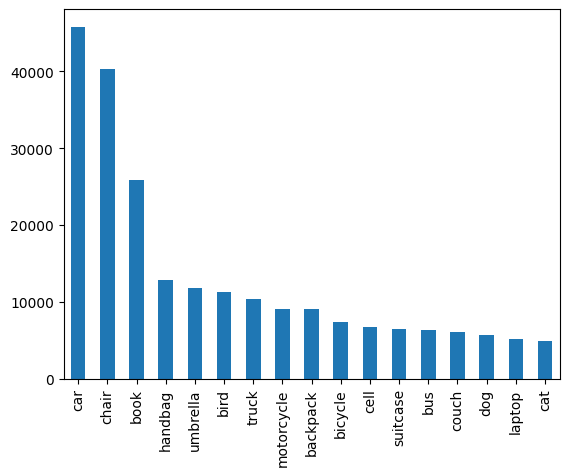

In [27]:
df.name.value_counts().plot(kind='bar')

## After

In [28]:
remove = car_only + chair_only + book_only + car_and_chair + car_and_chair + chair_and_book

df.drop(df[df['id'].isin(remove)].index, inplace=True)
df = df.reset_index()
df.drop(['index'], axis=1)
df.name.value_counts()

car           31238
chair         19875
book          16662
handbag       12741
umbrella      11785
bird          11047
truck         10288
backpack       8956
motorcycle     8887
bicycle        7258
cell           6618
suitcase       6414
bus            6297
couch          5963
dog            5681
laptop         5134
cat            4872
Name: name, dtype: int64

<Axes: >

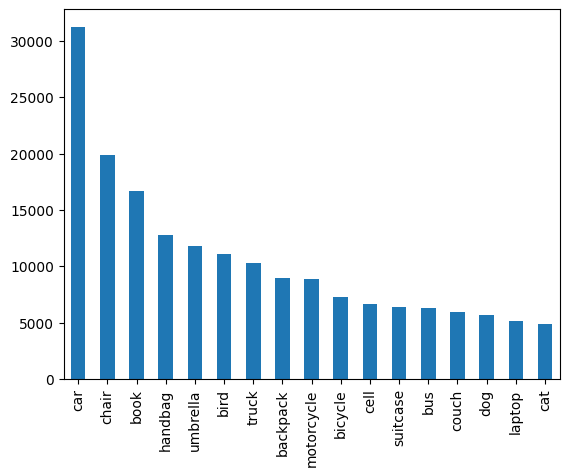

In [29]:
df.name.value_counts().plot(kind='bar')

In [30]:
chair_also = [i for i,l in zip(gp_by_id.id, gp_by_id.name) if ('chair' in l.tolist())]
gp_by_id[gp_by_id.id.isin(chair_also)]

,id,name
10,110,[chair]
11,113,[chair]
13,139,"[chair, book]"
16,164,[chair]
21,283,[chair]
...,...,...
56196,581670,[chair]
56198,581697,"[chair, umbrella]"
56214,581899,[chair]
56215,581900,"[chair, motorcycle, handbag, suitcase]"


# YOLO

In [31]:
df['label'] = df['name'].map(mp.set_index('Name')['Label'])
df['x_center'] = [((bbox[0] + (bbox[2]/2))/width) for bbox, width in zip(df['bbox'], df['width'])]
df['y_center'] = [((bbox[1] + (bbox[3]/2))/height) for bbox, height in zip(df['bbox'], df['height'])]
df['obj_width'] = [(bbox[2]/width) for bbox, width in zip(df['bbox'], df['width'])]
df['obj_height'] = [(bbox[3]/height) for bbox, height in zip(df['bbox'], df['height'])]
df

,index,id,bbox,category_id,file_name,height,width,set,name,label,x_center,y_center,obj_width,obj_height
0,0,495357,"[337.02, 244.46, 66.47, 66.75]",18,000000495357.jpg,479,640,train2017,dog,7,0.578523,0.580031,0.103859,0.139353
1,1,495357,"[255.84, 257.96, 181.8, 113.63]",4,000000495357.jpg,479,640,train2017,motorcycle,2,0.541781,0.657150,0.284062,0.237223
2,2,495357,"[509.65, 215.73, 47.88, 24.6]",31,000000495357.jpg,479,640,train2017,handbag,10,0.833734,0.476054,0.074813,0.051357
3,3,495357,"[22.66, 206.54, 21.9, 23.93]",31,000000495357.jpg,479,640,train2017,handbag,10,0.052516,0.456169,0.034219,0.049958
4,4,495357,"[354.36, 162.3, 30.66, 49.73]",31,000000495357.jpg,479,640,train2017,handbag,10,0.577641,0.390741,0.047906,0.103820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179711,9499,2685,"[502.51, 255.7, 40.14, 59.05]",31,000000002685.jpg,555,640,val2017,handbag,10,0.816531,0.513919,0.062719,0.106396
179712,9500,412362,"[585.75, 443.57, 54.25, 55.18]",31,000000412362.jpg,499,640,val2017,handbag,10,0.957617,0.944208,0.084766,0.110581
179713,9507,284764,"[109.8, 200.56, 143.07, 221.82]",77,000000284764.jpg,427,640,val2017,cell,15,0.283336,0.729438,0.223547,0.519485
179714,9508,439773,"[239.69, 331.03, 169.7, 111.76]",77,000000439773.jpg,480,640,val2017,cell,15,0.507094,0.806062,0.265156,0.232833


In [33]:
a = []
for l,x,y,width,height in zip(df['label'], df['x_center'], df['y_center'], df['obj_width'], df['obj_height']):
    a.append([l,x,y,width,height])

a = pd.Series(a)

df['YOLO'] = a

In [48]:
dic = {}
for id in df['file_name']:
    dic[id] = []

for id, yolo in zip(df['file_name'], df['YOLO']):
    dic[id].append(yolo)
df

,index,id,bbox,category_id,file_name,height,width,set,name,label,x_center,y_center,obj_width,obj_height,YOLO,dir
0,0,495357,"[337.02, 244.46, 66.47, 66.75]",18,000000495357.jpg,479,640,train2017,dog,7,0.578523,0.580031,0.103859,0.139353,"[7, 0.5785234375, 0.5800313152400836, 0.103859...",train2017/000000495357.jpg
1,1,495357,"[255.84, 257.96, 181.8, 113.63]",4,000000495357.jpg,479,640,train2017,motorcycle,2,0.541781,0.657150,0.284062,0.237223,"[2, 0.54178125, 0.6571503131524008, 0.2840625,...",train2017/000000495357.jpg
2,2,495357,"[509.65, 215.73, 47.88, 24.6]",31,000000495357.jpg,479,640,train2017,handbag,10,0.833734,0.476054,0.074813,0.051357,"[10, 0.833734375, 0.47605427974947806, 0.07481...",train2017/000000495357.jpg
3,3,495357,"[22.66, 206.54, 21.9, 23.93]",31,000000495357.jpg,479,640,train2017,handbag,10,0.052516,0.456169,0.034219,0.049958,"[10, 0.052515624999999996, 0.4561691022964509,...",train2017/000000495357.jpg
4,4,495357,"[354.36, 162.3, 30.66, 49.73]",31,000000495357.jpg,479,640,train2017,handbag,10,0.577641,0.390741,0.047906,0.103820,"[10, 0.577640625, 0.390741127348643, 0.0479062...",train2017/000000495357.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179711,9499,2685,"[502.51, 255.7, 40.14, 59.05]",31,000000002685.jpg,555,640,val2017,handbag,10,0.816531,0.513919,0.062719,0.106396,"[10, 0.81653125, 0.5139189189189188, 0.0627187...",val2017/000000002685.jpg
179712,9500,412362,"[585.75, 443.57, 54.25, 55.18]",31,000000412362.jpg,499,640,val2017,handbag,10,0.957617,0.944208,0.084766,0.110581,"[10, 0.9576171875, 0.9442084168336673, 0.08476...",val2017/000000412362.jpg
179713,9507,284764,"[109.8, 200.56, 143.07, 221.82]",77,000000284764.jpg,427,640,val2017,cell,15,0.283336,0.729438,0.223547,0.519485,"[15, 0.28333593749999997, 0.7294379391100704, ...",val2017/000000284764.jpg
179714,9508,439773,"[239.69, 331.03, 169.7, 111.76]",77,000000439773.jpg,480,640,val2017,cell,15,0.507094,0.806062,0.265156,0.232833,"[15, 0.5070937499999999, 0.8060624999999999, 0...",val2017/000000439773.jpg


# Save

### Image Names

In [39]:
df['dir'] = df['set'] + '/' + df['file_name']
df

,index,id,bbox,category_id,file_name,height,width,set,name,label,x_center,y_center,obj_width,obj_height,YOLO,dir
0,0,495357,"[337.02, 244.46, 66.47, 66.75]",18,000000495357.jpg,479,640,train2017,dog,7,0.578523,0.580031,0.103859,0.139353,"[7, 0.5785234375, 0.5800313152400836, 0.103859...",train2017/000000495357.jpg
1,1,495357,"[255.84, 257.96, 181.8, 113.63]",4,000000495357.jpg,479,640,train2017,motorcycle,2,0.541781,0.657150,0.284062,0.237223,"[2, 0.54178125, 0.6571503131524008, 0.2840625,...",train2017/000000495357.jpg
2,2,495357,"[509.65, 215.73, 47.88, 24.6]",31,000000495357.jpg,479,640,train2017,handbag,10,0.833734,0.476054,0.074813,0.051357,"[10, 0.833734375, 0.47605427974947806, 0.07481...",train2017/000000495357.jpg
3,3,495357,"[22.66, 206.54, 21.9, 23.93]",31,000000495357.jpg,479,640,train2017,handbag,10,0.052516,0.456169,0.034219,0.049958,"[10, 0.052515624999999996, 0.4561691022964509,...",train2017/000000495357.jpg
4,4,495357,"[354.36, 162.3, 30.66, 49.73]",31,000000495357.jpg,479,640,train2017,handbag,10,0.577641,0.390741,0.047906,0.103820,"[10, 0.577640625, 0.390741127348643, 0.0479062...",train2017/000000495357.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179711,9499,2685,"[502.51, 255.7, 40.14, 59.05]",31,000000002685.jpg,555,640,val2017,handbag,10,0.816531,0.513919,0.062719,0.106396,"[10, 0.81653125, 0.5139189189189188, 0.0627187...",val2017/000000002685.jpg
179712,9500,412362,"[585.75, 443.57, 54.25, 55.18]",31,000000412362.jpg,499,640,val2017,handbag,10,0.957617,0.944208,0.084766,0.110581,"[10, 0.9576171875, 0.9442084168336673, 0.08476...",val2017/000000412362.jpg
179713,9507,284764,"[109.8, 200.56, 143.07, 221.82]",77,000000284764.jpg,427,640,val2017,cell,15,0.283336,0.729438,0.223547,0.519485,"[15, 0.28333593749999997, 0.7294379391100704, ...",val2017/000000284764.jpg
179714,9508,439773,"[239.69, 331.03, 169.7, 111.76]",77,000000439773.jpg,480,640,val2017,cell,15,0.507094,0.806062,0.265156,0.232833,"[15, 0.5070937499999999, 0.8060624999999999, 0...",val2017/000000439773.jpg


In [41]:
file = list(set([e for e in df['dir']]))
np.savetxt('images.txt', file, fmt='%s')

In [44]:
a = np.loadtxt('images.txt', dtype=str)
a

array(['train2017/000000124663.jpg', 'train2017/000000541385.jpg',
       'train2017/000000082622.jpg', ..., 'train2017/000000187181.jpg',
       'train2017/000000498462.jpg', 'train2017/000000140812.jpg'],
      dtype='<U26')

In [ ]:
import shutil
import numpy as np

a = np.loadtxt('images.txt', dtype=str)

for e in a:
    shutil.copy(e, 'images')

### Labels

In [51]:
for e in dic.items():
    np.savetxt(f'labels/{e[0][:-4]}.txt', e[1], newline='\n', fmt='%.10g')